In [2]:
from surp import subgiants
import scipy
import numpy as np
import matplotlib.pyplot as plt
import arya
from statsmodels.distributions import ECDF
import pandas as pd

Text(0, 0.5, 'counts')

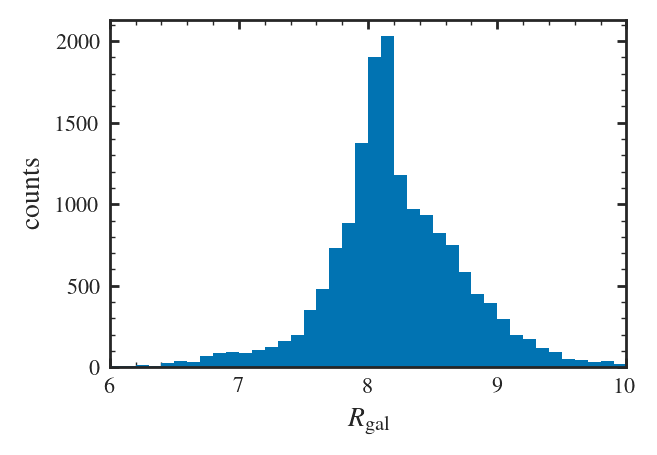

In [3]:
bins = np.arange(0, 20, 0.1)
counts, _, _ = plt.hist(subgiants.R_gal, bins=bins)
plt.xlim(6, 10)
plt.xlabel(r"$R_{\rm gal}$")
plt.ylabel("counts")

In [4]:
cdf = ECDF(subgiants.R_gal)

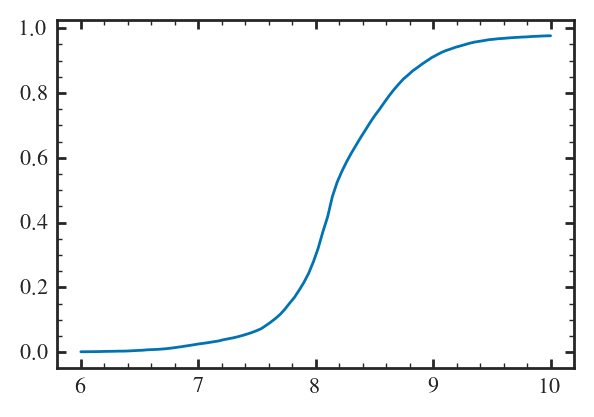

In [5]:
x = np.linspace(6, 10, 100)
y = cdf(x)
plt.plot(x, y)


In [6]:
zones = np.arange(0, 200)
Rs = (0.5 + zones)/10
table = pd.DataFrame({"zone": zones, "R": Rs, "cdf": cdf(bins + 0.1)/cdf(bins + 0.1)[-1]})

In [7]:
table.to_csv("../../data/R_subgiants_cdf.csv")

In [8]:
def sample_R():
    p = np.random.rand()
    return table.zone.loc[table.cdf > p].iloc[0]


In [9]:
sams = np.array([sample_R() for _ in range(10000)])

In [10]:
R_s = 1/10 * (sams + 1/2)

(5.0, 10.0)

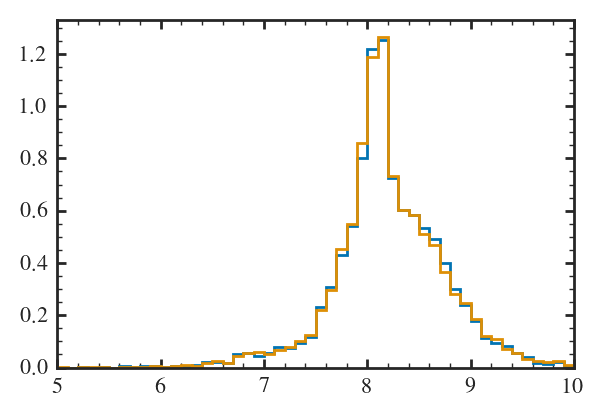

In [11]:
plt.hist(R_s, density=True, bins=bins, histtype="step");
plt.hist(subgiants.R_gal, density=True, bins=bins, histtype="step");
plt.xlim(5, 10)